In [1]:
import os
import sys
sys.path.append(os.getcwd() + os.sep +"..")
from decision_stump.stump import DecisionStump as Stump
from decision_tree.decision import DecisionTreeClassifier, DecisionTreeRegressor
from adaboost.adaboost import Adaboost as Ada
from gradientboost.gdbt import GradientBoostClassifier as GDBT
from random_forest.random_forest import RandomForest as RF
from utils.helper import get_dummies, multi_class_trainer, predictor

In [2]:
from sklearn import datasets
import random
import numpy as np
random.seed(2025)
np.random.seed(2025)

iris = datasets.load_iris()
X = iris.data
Y = iris.target

truncate_idx = -len(Y[Y > 1])
X = X[:truncate_idx, :]
Y = Y[:truncate_idx]
shuffle_idx = np.arange(len(X))
np.random.shuffle(shuffle_idx)

X = X[shuffle_idx]
Y = Y[shuffle_idx]

## Decision Stump

In [3]:
tr_idx = int(len(X)*0.7)
ds = Stump()
ds.train(X[:tr_idx, 0], Y[:tr_idx])
result = ds.predict(X[tr_idx:,0])
acc = (result == Y[tr_idx:]).mean()
print("test acc=", acc)
parameter_f1 = ds.get_parameter()[1]

best score =  0.9142857142857143
parameter: (1, 5.5)
---------------------
Training end !
test acc= 0.8333333333333334


## Decision Tree

In [4]:
X = iris.data
Y = iris.target
  
shuffle_idx = np.arange(len(X))
np.random.shuffle(shuffle_idx)
   
X = X[shuffle_idx]
Y = Y[shuffle_idx]

tr_idx = int(len(X)*0.7)
    
X_tr, Y_tr = X[:tr_idx, :], Y[:tr_idx]
X_te, Y_te = X[tr_idx:, :], Y[tr_idx:]


In [5]:
models = multi_class_trainer(X_tr, Y_tr, DecisionTreeClassifier)

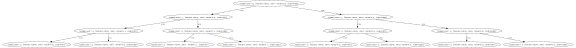

In [6]:
g = models[0].showtree()
g

In [7]:
num_classes = len(set(Y))
Y_pred = predictor(X_te, num_classes, models).argmax(axis=1)
print("test accuracy:", (Y_te == Y_pred).mean() )

test accuracy: 0.9333333333333333


## Random Forest

In [8]:
rf = RF(30, 0.7, 1)
rf.train(X_tr, Y_tr)
Y_pred_prob = rf.predict_prob(X_te)
print("test accuracy:", (Y_te == Y_pred_prob.argmax(axis=1)).mean().item())

test accuracy: 0.9777777777777777


## Gradient Boost

In [9]:
gdbt = GDBT(n_step=100, learning_rate=1.0, epsilon=1e-10, num_class=3, early_stop=5)

In [10]:
gdbt.train(X_tr, Y_tr)

In [11]:
print("test accuracy:", (gdbt.predict(X_te) == Y_te).mean())

test accuracy: 0.9333333333333333


## AdaBoost

In [12]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
N = len(diabetes.data)
X = diabetes.data
Y = diabetes.target
shuffle_idx = np.arange(N)
np.random.shuffle(shuffle_idx)
X = X[shuffle_idx]
Y = Y[shuffle_idx]

In [13]:
ada = Ada(lr=.1)
tr_idx = int(len(X)*0.7)
X_tr, Y_tr = X[:tr_idx, :], Y[:tr_idx]
X_te, Y_te = X[tr_idx:, :], Y[tr_idx:]
ada.train(X_tr, Y_tr, mode="l2")

In [14]:
print("test accuracy", (np.abs(ada.predict(X_te) - Y_te)).mean())

test accuracy 49.274436090225564
